In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the depression and anxiety datasets from CSV files
depression_df = pd.read_csv('/.csv')
anxiety_df = pd.read_csv('/.csv')

# Define a function to extract keywords related to COVID-19 from a given string
def extract_covid_keywords(text):
    covid_keywords = []
    if isinstance(text, str):
        # Search for keywords in the selftext and title using regular expressions
        covid_regex = re.compile(r'covid-19|coronavirus|pandemic|quarantine|lockdown|vaccine', re.IGNORECASE)
        covid_keywords = covid_regex.findall(text)
    return covid_keywords



In [4]:
depression_df.head(3)

,author,created_utc,selftext,title,subreddit
0,Supreme_wing,2019-04-01 00:03:28,god. i dont get people sometimes. just some pe...,Just a rant on a Sunday night,depression
1,tubrafinho,2019-04-01 00:13:47,"this will be my first post here, and i'm relat...",what to do when you really want to die but at ...,depression
2,zillarillazilla,2019-04-01 00:14:20,apologies if this isn’t allowed - feel free to...,How to help my friend,depression


In [5]:
anxiety_df.head(3)

,author,created_utc,selftext,title,subreddit
0,egraham140,2019-04-01 00:01:57,"i moved states about 9 months ago, didn’t make...","Moved, made very little “friends”, and now i f...",anxiety
1,Digmur,2019-04-01 00:17:47,and be that kid that didn't worry too much abo...,I wish i could go back in time,anxiety
2,edtehgar,2019-04-01 00:21:03,just wondering how other people cope or deal w...,Coping with anxiety attacks,anxiety


In [6]:
# Apply the function to the selftext and title columns of both datasets
depression_df['covid_keywords'] = depression_df['selftext'].apply(extract_covid_keywords) + depression_df['title'].apply(extract_covid_keywords)
anxiety_df['covid_keywords'] = anxiety_df['selftext'].apply(extract_covid_keywords) + anxiety_df['title'].apply(extract_covid_keywords)


In [7]:
anxiety_df.head(3)

,author,created_utc,selftext,title,subreddit,covid_keywords
0,egraham140,2019-04-01 00:01:57,"i moved states about 9 months ago, didn’t make...","Moved, made very little “friends”, and now i f...",anxiety,[]
1,Digmur,2019-04-01 00:17:47,and be that kid that didn't worry too much abo...,I wish i could go back in time,anxiety,[]
2,edtehgar,2019-04-01 00:21:03,just wondering how other people cope or deal w...,Coping with anxiety attacks,anxiety,[]


In [10]:
# Convert the 'created_utc' column to datetime type
depression_df['created_utc'] = pd.to_datetime(depression_df['created_utc'])
anxiety_df['created_utc'] = pd.to_datetime(anxiety_df['created_utc'])


In [11]:

# Group the data by year and count the number of posts containing COVID-19 keywords
depression_covid_count = depression_df.groupby(depression_df['created_utc'].dt.year)['covid_keywords'].apply(lambda x: sum(map(len, x)))
anxiety_covid_count = anxiety_df.groupby(anxiety_df['created_utc'].dt.year)['covid_keywords'].apply(lambda x: sum(map(len, x)))

In [37]:
# Define a function to check if the 'covid_keywords' column is empty
# Define a function to check if the 'covid_keywords' column is empty
def is_empty(row):
    if pd.isnull(row['covid_keywords']):
        return True
    if not row['covid_keywords']:
        return True
    return False



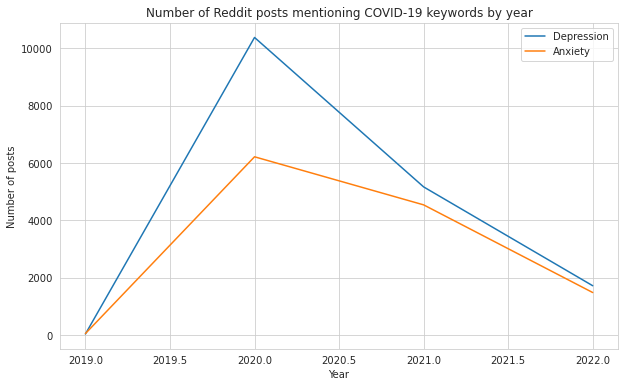

In [12]:

# Plot the results as a line chart
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot(depression_covid_count.index, depression_covid_count.values, label='Depression')
plt.plot(anxiety_covid_count.index, anxiety_covid_count.values, label='Anxiety')
plt.title('Number of Reddit posts mentioning COVID-19 keywords by year')
plt.xlabel('Year')
plt.ylabel('Number of posts')
plt.legend()
plt.show()


In [ ]:
#word frequency 

In [23]:
# Define a function to preprocess the text data
# Define a function to preprocess the text data
def preprocess_text(text):
    # Replace missing values with empty strings
    text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and short words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    # Lemmatize the tokens
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
# Apply the function to the selftext column of both datasets
depression_df['clean_selftext'] = depression_df['selftext'].apply(preprocess_text)
anxiety_df['clean_selftext'] = anxiety_df['selftext'].apply(preprocess_text)


In [25]:
# Define a function to get the top n words by frequency in a given text column
def get_top_words(text_column, n):
    # Combine all the text into a single string
    all_text = ' '.join(text_column)
    # Tokenize the text
    tokens = nltk.word_tokenize(all_text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Count the frequency of each word
    word_counts = Counter(tokens)
    # Get the top n words by frequency
    top_words = word_counts.most_common(n)
    return top_words

In [26]:
# Get the top 20 words by frequency for each year in the depression subreddit
depression_top_words_by_year = {}
for year in range(2010, 2023):
    depression_year_df = depression_df[depression_df['created_utc'].dt.year == year]
    depression_top_words_by_year[year] = get_top_words(depression_year_df['clean_selftext'], n=20)


In [41]:
depression_top_words_by_year[year]

[('dont', 114601),
 ('feel', 114523),
 ('like', 114477),
 ('want', 73293),
 ('life', 71127),
 ('know', 69893),
 ('get', 64214),
 ('ive', 62492),
 ('time', 59865),
 ('even', 57347),
 ('cant', 53705),
 ('year', 49879),
 ('thing', 47718),
 ('people', 46676),
 ('friend', 46128),
 ('day', 44930),
 ('really', 44417),
 ('one', 42520),
 ('would', 36571),
 ('make', 36176)]